## Tips Dataset

#### Cho dữ liệu tips có sẵn trong seaborn library. Hãy vẽ những biểu đồ theo yêu cầu, và đối chiếu với kết quả cho trước:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
%config Completer.use_jedi = False

In [2]:
# Load dữ liệu tips có sẵn trong seaborn library
#total_bill: Total bill (cost of the meal), including tax, in US dollars
#tip: Tip (gratuity) in US dollars
#sex: Sex of person paying for the meal (0=male, 1=female)
#smoker: Smoker in party? (0=No, 1=Yes)
#day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
#time: 0=Day, 1=Night
#size: Size of the party
tips=sb.load_dataset('tips')
tips.info()
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


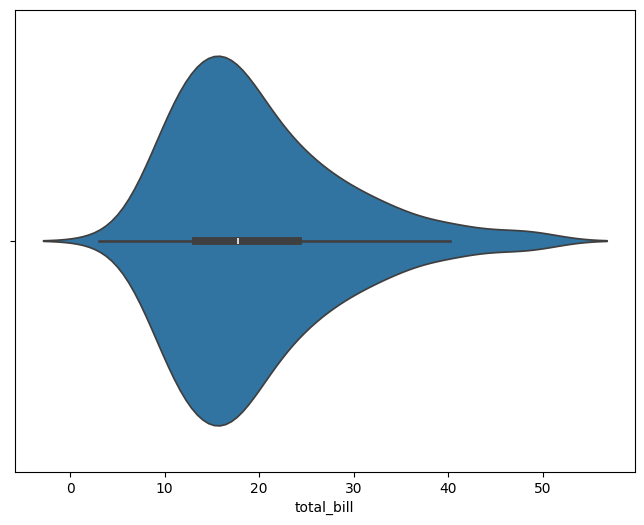

<Figure size 640x480 with 0 Axes>

In [3]:
# Vẽ violinplot cho cho cột total_bill
plt.figure(figsize=(8,6))
sb.violinplot(data=tips,
             x='total_bill')
plt.show()
plt.clf()

- Comment: It can be seen that distribution of total_bill is not symmetric, it is skewed to the right

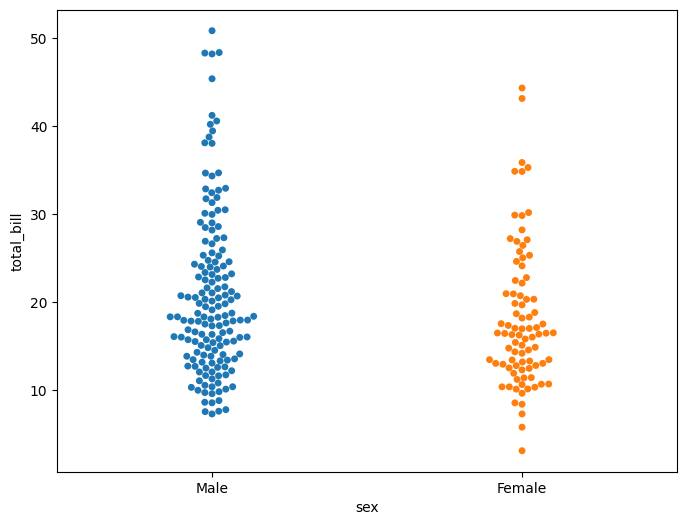

<Figure size 640x480 with 0 Axes>

In [4]:
# Câu 2: Vẽ swarmplot cho cột total_bill theo sex
plt.figure(figsize=(8,6))
sb.swarmplot(data=tips,
            x='sex',
            y='total_bill',
            hue='sex')
plt.show()
plt.clf()


- Comment: It can be seen that distribution of total_bill is not symmetric, it is skewed to the right

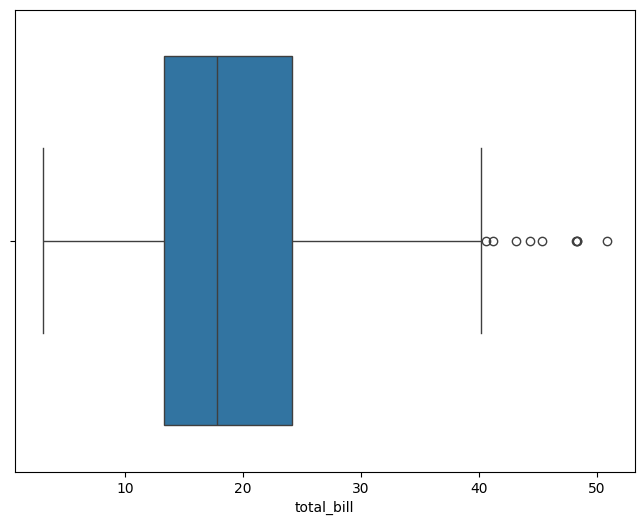

<Figure size 640x480 with 0 Axes>

In [5]:
# Vẽ boxplot cho cột total_bill
plt.figure(figsize=(8,6))
sb.boxplot(data=tips,x='total_bill')
plt.show()
plt.clf()

- **Comment: There are many outliers in the total_bill column.**

<Figure size 800x600 with 0 Axes>

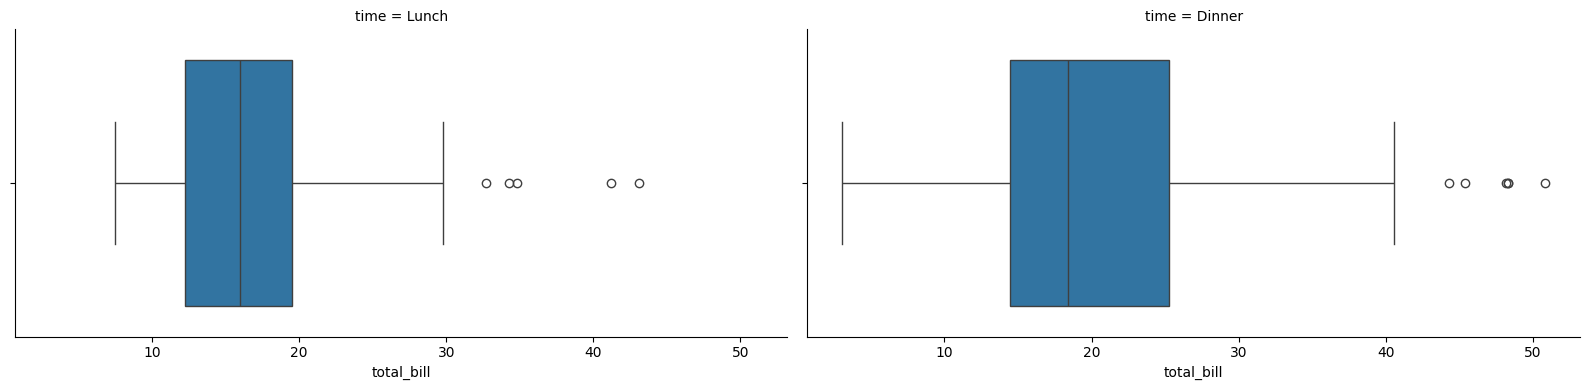

<Figure size 640x480 with 0 Axes>

In [6]:
# Tạo FacetGrid của total_bill theo 'time' và chỉ định thứ tự của các cột bằng col_order
plt.figure(figsize=(8,6))
fg = sb.FacetGrid(data=tips, col="time", col_order=['Lunch', 'Dinner'], height=4, aspect=2)
fg.map(sb.boxplot, 'total_bill', order=None)
plt.show()
plt.clf()

- **Comment: There are outliers in both lunch and dinner. The median of lunch is lower than dinner.**

<Figure size 1200x800 with 0 Axes>

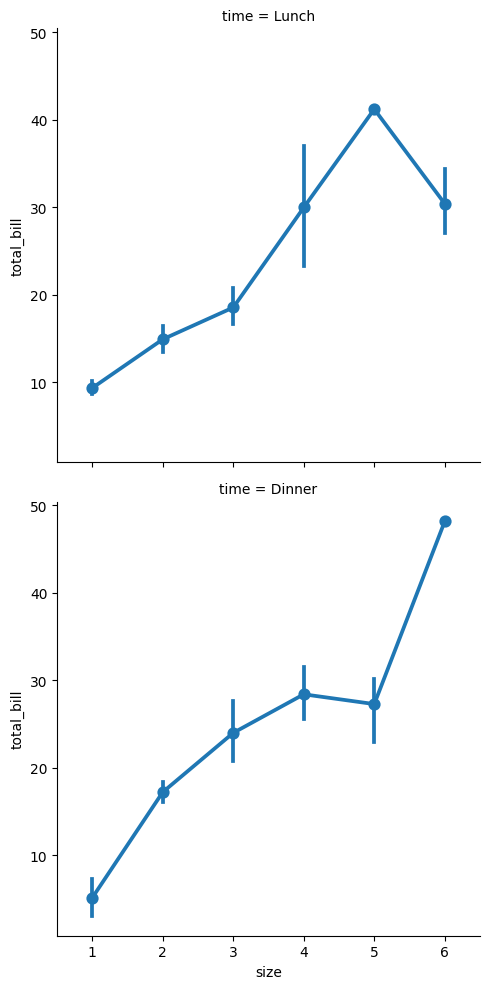

<Figure size 640x480 with 0 Axes>

In [7]:
# Tạo catplot chứa point plot của giá trị 'total_bill' thay đổi theo size và tách dòng theo ‘time’
plt.figure(figsize=(12,8))
sb.catplot(data=tips,
            x='size',
            y='total_bill',
            kind='point',
            row='time')
plt.show()
plt.clf()

- **Comment: The total bill is increasing with the size of the party.**

<Figure size 1200x800 with 0 Axes>

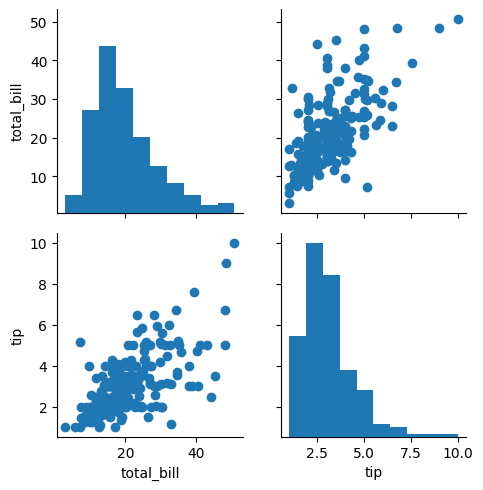

<Figure size 640x480 with 0 Axes>

In [8]:
# Tạo PairGrid với scatter plot thể hiện liên quan giữa "total_bill" và "tip"
plt.figure(figsize=(12,8))
# Prepare a PairGrid
pg=sb.PairGrid(data=tips,vars=['total_bill','tip'])
# Map a scatter plot to the upper triangle
pg.map_diag(plt.hist)
# Map a scatter plot to the lower triangle
pg.map_offdiag(plt.scatter) 
plt.show()
plt.clf()

<Figure size 1200x800 with 0 Axes>

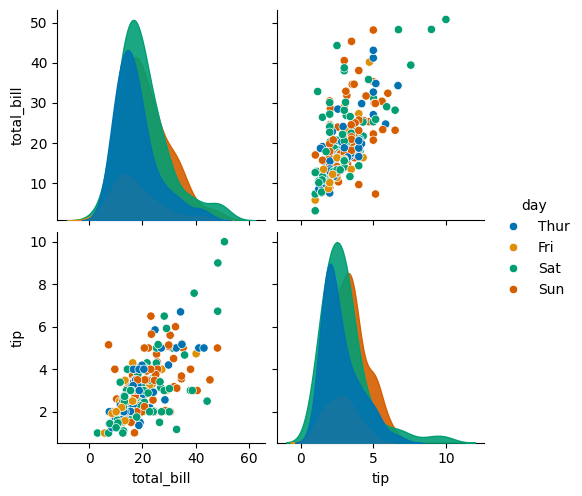

<Figure size 640x480 with 0 Axes>

In [9]:
# Tạo Pairplot với scatter plot thể hiện liên quan giữa "total_bill" và "tip", sử dụng palette color = 'bright' 
# Bạn nhận xét gì về biểu đồ vừa tạo
plt.figure(figsize=(12,8))
sb.pairplot(data=tips,vars=['total_bill','tip'],kind='scatter',hue='day',palette='colorblind',diag_kws={'alpha':.9})
plt.show()
plt.clf()

- **Comment: tips and total_bill are positively correlated**